# <center> Assignment 3 </center>

#### Name: Yousef EL-Qawasmi

#### Student ID: 190615960

Given a train set and a test set (without label), the following code implements a neural network model. You may refer to the keras menu: https://keras.io. Please submit the folling in one zip file: (1) Figure for Q1 , (2)code for Q2, (3) result 'pred.csv' for Q2, (4) Figure for Q2. 

### Q1. Draw the structure of the model on a paper. Show clearly the number of layers, and the type of each layer and the specs.

### Q2. Use the training set to tune the model. (You may split the train set into train-valid sets.) To tune the model, you many add/remove layers, set different parameters. 

#### (a)  Your prediction 'pred.csv' will be evaluated by classification accuracy. The accuracy will be compared across your classmates. A higher ranked prediction accuracy will get more scores.
#### (b) Draw the structure of your new model on the paper, and illustrate the difference you have made compared to the given model.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pydot
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

digits = pd.read_csv("train.csv")
digitsTest = pd.read_csv("test_nolabel.csv")

digits.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


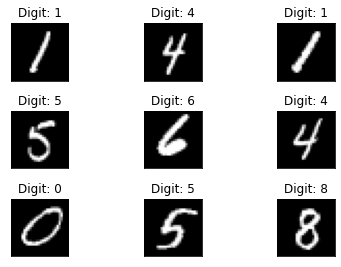

In [2]:

train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i].reshape(28,-1),cmap="gray")
    plt.title("Digit: {}".format(trainLabels_raw[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

In [3]:
# The size of the data
train.shape, trainLabels_raw.shape, test.shape

((6000, 784), (6000,), (1000, 784))

In [4]:

train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

model = Sequential()
model.add(Conv2D(64, kernel_size=(2,4), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(4,3),activation="relu"))
model.add(Conv2D(64,(2,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Flatten())

model.add(Dense(num_categories, activation = "softmax"))


#Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])



# Train the model
batch_size = 34
num_epoch = 9
model_log = model.fit(train.reshape(-1,28,28,1),trainLabels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_split=0.34
        )


tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)
## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))

Epoch 1/9
117/117 [==============================] - 16s 133ms/step - loss: 0.5846 - accuracy: 0.8146 - val_loss: 0.2149 - val_accuracy: 0.9314
Epoch 2/9
117/117 [==============================] - 15s 123ms/step - loss: 0.1414 - accuracy: 0.9566 - val_loss: 0.1454 - val_accuracy: 0.9593
Epoch 3/9
117/117 [==============================] - 14s 123ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.1207 - val_accuracy: 0.9716
Epoch 4/9
117/117 [==============================] - 15s 125ms/step - loss: 0.0506 - accuracy: 0.9851 - val_loss: 0.1261 - val_accuracy: 0.9662
Epoch 5/9
117/117 [==============================] - 14s 122ms/step - loss: 0.0291 - accuracy: 0.9896 - val_loss: 0.1363 - val_accuracy: 0.9642
Epoch 6/9
117/117 [==============================] - 17s 143ms/step - loss: 0.0326 - accuracy: 0.9876 - val_loss: 0.1501 - val_accuracy: 0.9647
Epoch 7/9
117/117 [==============================] - 16s 133ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.1714 - val_accuracy:

In [5]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == max(y):
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)

In [6]:
ypred_num

[6,
 2,
 7,
 1,
 9,
 3,
 4,
 3,
 4,
 1,
 0,
 5,
 0,
 2,
 4,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 1,
 7,
 7,
 0,
 5,
 4,
 7,
 5,
 3,
 4,
 2,
 7,
 0,
 5,
 1,
 4,
 7,
 6,
 9,
 8,
 0,
 4,
 7,
 2,
 1,
 1,
 6,
 2,
 7,
 3,
 3,
 8,
 9,
 2,
 0,
 9,
 6,
 9,
 1,
 9,
 8,
 2,
 7,
 5,
 1,
 1,
 6,
 7,
 0,
 6,
 8,
 0,
 8,
 7,
 1,
 9,
 7,
 7,
 8,
 2,
 7,
 1,
 1,
 1,
 3,
 8,
 6,
 3,
 9,
 3,
 4,
 5,
 8,
 2,
 8,
 3,
 7,
 1,
 9,
 9,
 8,
 9,
 3,
 4,
 6,
 5,
 4,
 0,
 6,
 1,
 0,
 1,
 0,
 4,
 3,
 7,
 7,
 5,
 3,
 6,
 9,
 6,
 5,
 0,
 2,
 9,
 7,
 0,
 5,
 7,
 2,
 1,
 8,
 9,
 5,
 7,
 8,
 9,
 6,
 1,
 9,
 3,
 1,
 9,
 4,
 4,
 1,
 2,
 8,
 3,
 5,
 2,
 8,
 4,
 9,
 2,
 3,
 2,
 2,
 2,
 9,
 8,
 0,
 3,
 0,
 8,
 4,
 4,
 7,
 4,
 3,
 8,
 6,
 5,
 6,
 5,
 1,
 6,
 4,
 9,
 6,
 1,
 0,
 9,
 4,
 8,
 7,
 2,
 9,
 9,
 1,
 3,
 1,
 9,
 4,
 6,
 9,
 3,
 4,
 6,
 2,
 3,
 1,
 6,
 8,
 3,
 4,
 6,
 6,
 2,
 8,
 0,
 1,
 5,
 7,
 9,
 3,
 9,
 8,
 1,
 2,
 4,
 2,
 7,
 9,
 2,
 4,
 8,
 4,
 5,
 7,
 0,
 7,
 8,
 7,
 7,
 6,
 6,
 1,
 1,
 4,
 4,
 4,
 1,
 9,
 6,
 0,
 0,
